<h1>Cyfrowe przetwarzanie sygnałów i obrazów</h1>
<h2>Przetwarzanie i analiza sygnału EKG</h2>
<b>Autorki:</b> Barbara Parzonka 263955, Joanna Zoglowek 264452
<br><br>
<b>Ćwiczenie 3.</b><br>
Celem ćwiczenia jest obserwacja widma sygnału EKG.
<br>1. Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie
<br>2. Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo amplitudowe sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza
częstotliwość próbkowania.
<br>3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego w
punkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem ecg100
(można wyznaczyć różnicę sygnałów).
<br><br>
<b>Opis realicaji zadania</b> <br>
Funkcje wykorzystne w tym zadaniu pochodzą z zadań wcześniejszych.

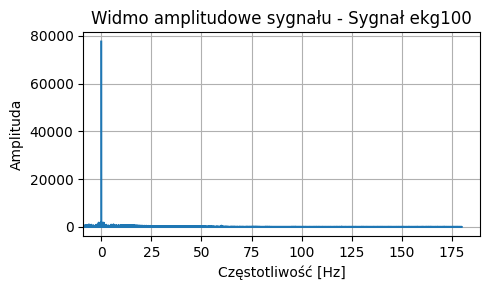

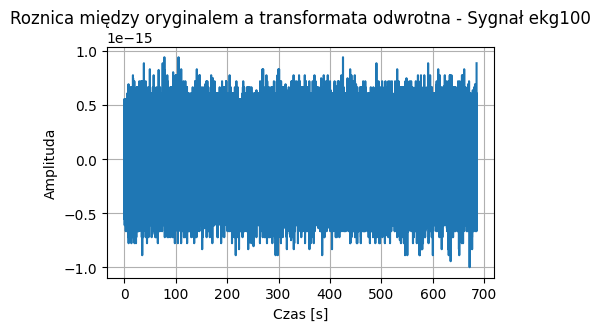

In [28]:
import numpy as np
import matplotlib.pyplot as plt

xarray=[]
valuesArray=[]
datapath='../data/'
filepath=datapath+'ekg100.txt'
bottomLimit=0
upperLimit=0
hasFirstTime=False
frequency=360

def readFile(filename=filepath, frequency=frequency, hasFirstTime=hasFirstTime):
    timePeriod = 1 / frequency
    global xarray, valuesArray, numberOfCases
    
    xarray.clear()
    valuesArray.clear()
    try:
        with open(filename, 'r') as file:
            for line in file:
                columns = line.split()
                if hasFirstTime and len(columns) > 1:
                    xarray.append(float(columns[0]))
                    columns = columns[1:]  # Usun istniejaca kolumne
                else:
                    xarray.append(len(xarray) * timePeriod)
                
                for i, value in enumerate(columns):
                    if len(valuesArray) <= i:
                        valuesArray.append([])  #Stworz nowa liste
                    valuesArray[i].append(float(value))
                    
        numberOfCases = len(valuesArray)
        return True
    except Exception as e:
        with out:
            print("Błąd odczytu pliku", str(e))
        return False

def fourierIOdwrotny(x,fs, nazwa):
    n=len(x)
    fourier=np.fft.fft(x)
    freq_axis = np.fft.fftfreq(n, d=1/fs)
    modul=abs(fourier)
    plt.figure(figsize=(5,3))
    plt.plot(freq_axis, modul)
    plt.title('Widmo amplitudowe sygnału - '+ nazwa)
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Amplituda')
    plt.tight_layout()
    plt.grid(True)
    #plt.xlim(0, fs/2)
    margin = 0.05  # 5% margin
    xmin, xmax = 0, fs/2  # Desired domain
    xmargin = (xmax - xmin) * margin
    plt.xlim(xmin - xmargin, xmax + xmargin)
    plt.show()
    
    odwrotna= np.fft.ifft(fourier)
    modulOdwrotna=abs(odwrotna)
    modulFunkcji=[abs(ele) for ele in x]
    roznica=modulOdwrotna-modulFunkcji
    plt.figure(figsize=(5,3))
    plt.plot(xarray, roznica)
    plt.title('Roznica między oryginalem a transformata odwrotna - '+  nazwa)
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.grid(True)
    #plt.ylim(-0.025, 0.025)
    plt.show()

readFile()
fourierIOdwrotny(valuesArray[0],frequency, 'Sygnał ekg100')


<b>Wnioski z ćwiczenia</b> <br>
Sygnał EKG100 jest złożony ze składowych o niskiej częstotliwości. Transformata odwrotna jest zbliżona do oryginału - różnice występujące na 15 rzędzie mogą wynikać z przybliżeń stosowanych w obliczniach.